In [1]:
# setup the P4P client
# https://mdavidsaver.github.io/p4p/client.html#usage
import numpy as np
import time
import matplotlib.pyplot as plt
from p4p.client.thread import Context
print( Context.providers() )
ctxt = Context('pva')

# Some useful pointers to reduce string lengths
Root = 'kek_bpm_rfsoc_demo_ioc:Root'
AxiVersion  = f'{Root}:RFSoC:AxiSocCore:AxiVersion'
ReadoutCtrl = f'{Root}:RFSoC:Application:ReadoutCtrl'
AdcDispProcessor  = [ f'{Root}:AdcDispProcessor[{i}]'  for i in range(4)]
AmpDispProcessor  = [ f'{Root}:AmpDispProcessor[{i}]'  for i in range(4)]
AmpFaultProcessor = [ f'{Root}:AmpFaultProcessor[{i}]' for i in range(4)]

# Function to trigger the waveform ring buffers
def TrigRingBuffer(trigType='liveDisplay'):

    if trigType=='liveDisplay':
        for i in range(4):
            ctxt.put(  f'{AdcDispProcessor[i]}:RxEnable', 1)
            ctxt.put(  f'{AmpDispProcessor[i]}:RxEnable', 1)             
            ctxt.put(  f'{AdcDispProcessor[i]}:Updated', 0)
            ctxt.put(  f'{AmpDispProcessor[i]}:Updated', 0)        
        ctxt.put( f'{ReadoutCtrl}:LiveDispTrigRaw', 1)
        #ctxt.rpc( f'{ReadoutCtrl}:LiveDispTrig')
        for i in range(4):
            # Wait for Waveform
            while ( ctxt.get( f'{AdcDispProcessor[i]}:Updated') != True):
                time.sleep(0.01)
            while ( ctxt.get( f'{AmpDispProcessor[i]}:Updated') != True):
                time.sleep(0.01)                
    
    elif trigType=='faultDisplay':
        for i in range(4):
            ctxt.put(  f'{AmpFaultProcessor[i]}:RxEnable', 1)               
            ctxt.put(  f'{AmpFaultProcessor[i]}:Updated', 0)         
        ctxt.put( f'{ReadoutCtrl}:SwFaultTrigRaw', 1)
        # ctxt.rpc( f'{ReadoutCtrl}:SwFaultTrig')
        for i in range(4):
            # Wait for Waveform
            while ( ctxt.get( f'{AmpFaultProcessor[i]}:Updated') != True):
                time.sleep(0.01)  
    
    else:
        print('Error: TrigRingBuffer.trigType={trigType} is not supported')

# Function to plot the ADC/DAC waveforms
def PlotWavform(plotType='liveDisplay',dataType='Amp',ch=0,xMin=0,xMax=20):

    if plotType=='liveDisplay':
        if dataType=='Adc':
            xData = ctxt.get(f'{AdcDispProcessor[ch]}:Time')
            yData = ctxt.get(f'{AdcDispProcessor[ch]}:WaveformData')
        else:
            xData = ctxt.get(f'{AmpDispProcessor[ch]}:Time')
            yData = ctxt.get(f'{AmpDispProcessor[ch]}:WaveformData')               
    
    elif plotType=='faultDisplay':
        xData = ctxt.get(f'{AmpFaultProcessor[ch]}:Time')
        yData = ctxt.get(f'{AmpFaultProcessor[ch]}:WaveformData')            
    else:
        print('Error: PlotWavform.plotType={trigType} is not supported')

    plt.plot(xData,yData)
    plt.xlim(xMin,xMax)
    plt.xlabel( 'Time (ns)' )
    plt.ylabel( f'{dataType}[ch={ch}] (Counts)' )
    plt.show()

['pva']


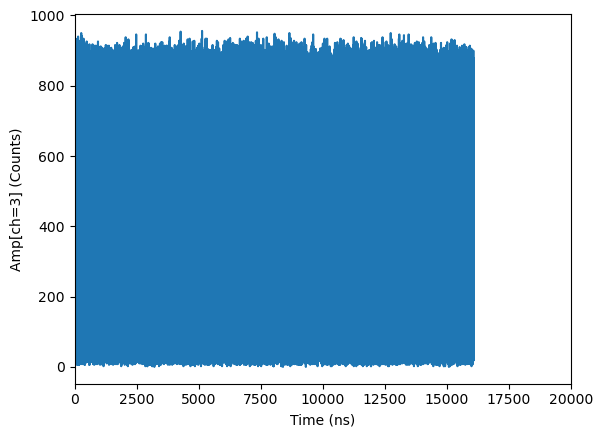

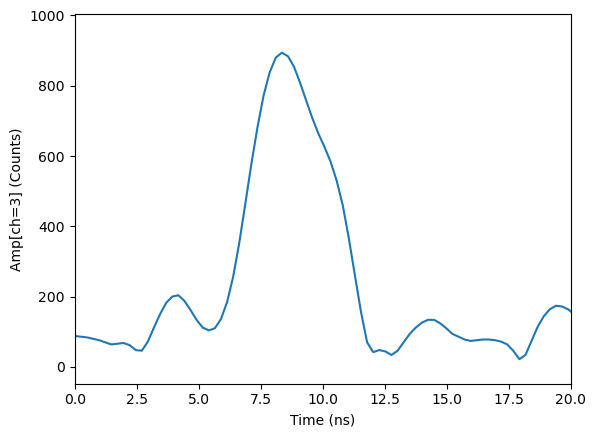

In [177]:
# Trigger the Fault display
TrigRingBuffer(trigType='faultDisplay')

# Plot ADC[CH=2] for 20 us
PlotWavform(plotType='faultDisplay',dataType='Amp',ch=3, xMin=0, xMax=20.0E+3)

# Plot ADC[CH=2] for 20 ns
PlotWavform(plotType='faultDisplay',dataType='Amp',ch=3, xMin=0, xMax=20)

In [178]:
def peak_search(waveform,start_index):
    mountain_maxima = []
    points_per_bunch = 16*4
    for i in range(start_index, len(waveform)-points_per_bunch+start_index, points_per_bunch):
        peak = max(waveform[i:i+points_per_bunch])
        if peak >= 200:
            mountain_maxima.append(peak)
        #else:
         #   mountain_maxima.append(0)
    return np.array(mountain_maxima)

In [55]:
"""
amp_dict_0={}
peak_dict_0={}
amp_dict_1={}
peak_dict_1={}
amp_dict_2={}
peak_dict_2={}
amp_dict_3={}
peak_dict_3={}
"""

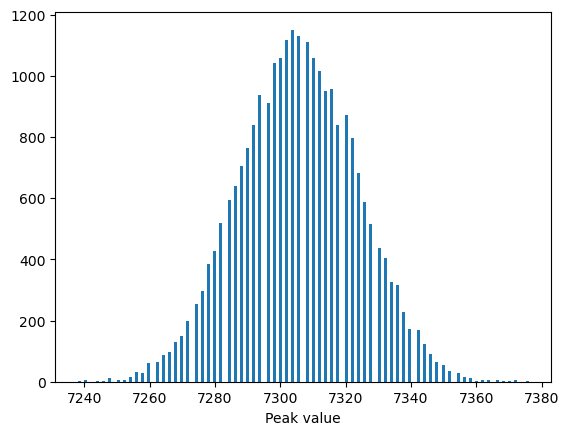

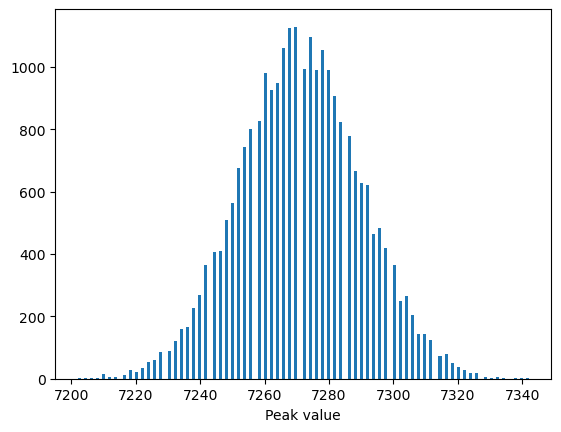

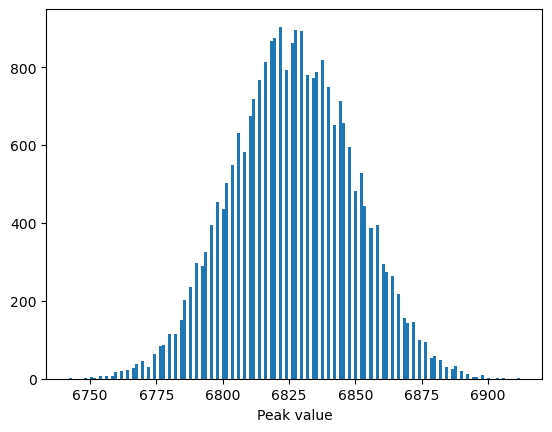

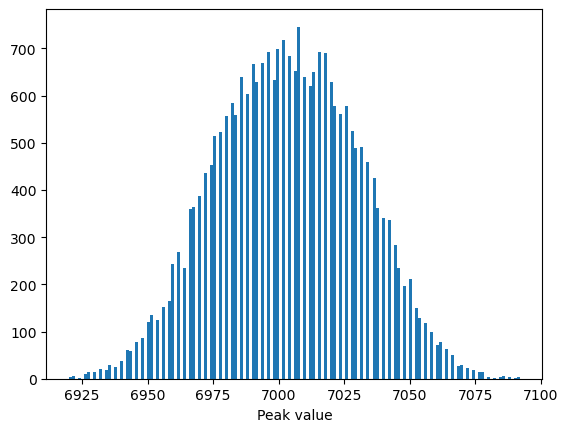

In [193]:
string='32000'
amp_0=[]
amp_1=[]
amp_2=[]
amp_3=[]
peak_0=[]
peak_1=[]
peak_2=[]
peak_3=[]
for i in range(25):
    TrigRingBuffer(trigType='faultDisplay')
    points_per_bunch = 16*4
    wave_0=ctxt.get(f'{AmpFaultProcessor[0]}:WaveformData')
    wave_1=ctxt.get(f'{AmpFaultProcessor[1]}:WaveformData')
    wave_2=ctxt.get(f'{AmpFaultProcessor[2]}:WaveformData')
    wave_3=ctxt.get(f'{AmpFaultProcessor[3]}:WaveformData')
    peak_0.append(peak_search(wave_0,np.argmin(wave_0[:points_per_bunch])))
    peak_1.append(peak_search(wave_1,np.argmin(wave_1[:points_per_bunch])))
    peak_2.append(peak_search(wave_2,np.argmin(wave_2[:points_per_bunch])))
    peak_3.append(peak_search(wave_3,np.argmin(wave_3[:points_per_bunch])))
    if i < 5:
        amp_0.append(wave_0)
        amp_1.append(wave_1)
        amp_2.append(wave_2)
        amp_3.append(wave_3)
    time.sleep(1)
    

amp_dict_0[string]=amp_0
amp_dict_1[string]=amp_1
amp_dict_2[string]=amp_2
amp_dict_3[string]=amp_3
peak_dict_0[string]=peak_0
peak_dict_1[string]=peak_1
peak_dict_2[string]=peak_2
peak_dict_3[string]=peak_3

plt.hist(np.concatenate(peak_0),bins=150)
plt.xlabel('Peak value')
plt.show()
plt.hist(np.concatenate(peak_1),bins=150)
plt.xlabel('Peak value')
plt.show()
plt.hist(np.concatenate(peak_2),bins=150)
plt.xlabel('Peak value')
plt.show()
plt.hist(np.concatenate(peak_3),bins=150)
plt.xlabel('Peak value')
plt.show()

In [73]:
peak_dict_0['4000']

[array([538, 566, 582, ..., 580, 592, 574], dtype=int16),
 array([538, 566, 582, ..., 580, 592, 574], dtype=int16),
 array([570, 570, 590, ..., 594, 634, 592], dtype=int16),
 array([570, 570, 590, ..., 594, 634, 592], dtype=int16),
 array([604, 602, 610, ..., 596, 604, 562], dtype=int16),
 array([588, 572, 584, ..., 598, 600, 618], dtype=int16),
 array([582, 576, 602, ..., 596, 570, 606], dtype=int16),
 array([578, 560, 604, ..., 574, 580, 598], dtype=int16),
 array([592, 576, 578, ..., 566, 592, 592], dtype=int16),
 array([596, 570, 616, ..., 594, 596, 556], dtype=int16),
 array([596, 570, 616, ..., 594, 596, 556], dtype=int16),
 array([602, 584, 626, ..., 616, 552, 580], dtype=int16),
 array([570, 572, 572, ..., 554, 588, 560], dtype=int16),
 array([594, 594, 588, ..., 584, 568, 570], dtype=int16),
 array([580, 594, 586, ..., 560, 612, 656], dtype=int16),
 array([600, 594, 608, ..., 596, 568, 610], dtype=int16),
 array([576, 582, 592, ..., 588, 608, 590], dtype=int16),
 array([572, 5

In [194]:
result_peak=[]
result_peak.append(peak_dict_0)
result_peak.append(peak_dict_1)
result_peak.append(peak_dict_2)
result_peak.append(peak_dict_3)
result_amp=[]
result_amp.append(amp_dict_0)
result_amp.append(amp_dict_1)
result_amp.append(amp_dict_2)
result_amp.append(amp_dict_3)

In [195]:
import pickle

with open('../data/Peakdata_1GHz_4072MSPS_16nsspacing_powerup.pkl','wb') as file:
    pickle.dump(result_peak, file)

#with open('../data/Ampdata_1GHz_4072MSPS.pkl','wb') as file:
#    pickle.dump(result_amp, file)